In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [17]:
my_data_dir = "C:/Users/ayushjain9/Desktop/Udacity/CNN_Project/cell_images"
my_data_dir

'C:/Users/ayushjain9/Desktop/Udacity/CNN_Project/cell_images'

In [18]:
os.listdir(my_data_dir)

['test', 'train']

In [19]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [20]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [21]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [22]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [23]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

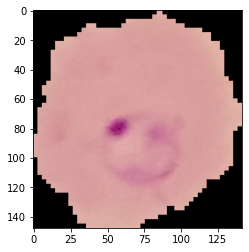

In [24]:
para_img= imread(para_cell)
# converts png file to array
plt.imshow(para_img)

In [25]:
para_img.shape

(148, 142, 3)

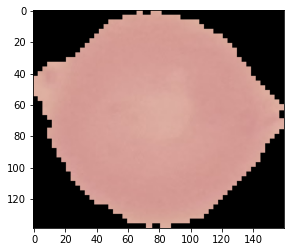

In [26]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [27]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [28]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [29]:
len(os.listdir(test_path+'\\parasitized'))

1300

In [30]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\ayushjain9\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


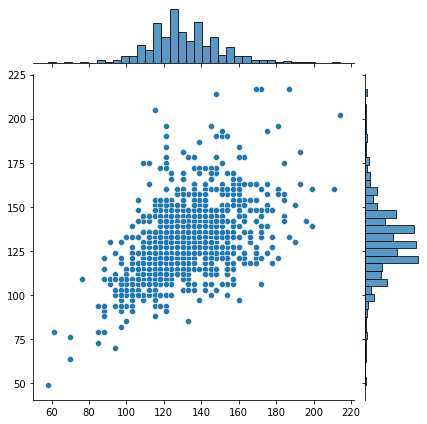

In [31]:
sns.jointplot(dim1,dim2)

In [32]:
np.mean(dim1)

130.92538461538462

In [33]:
np.mean(dim2)

130.75

**resize all images**

In [34]:
image_shape = (130,130,3)

In [35]:
130*130*30

507000

**Preparing the data**

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [42]:
imread(para_cell).max()

0.9098039

In [43]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

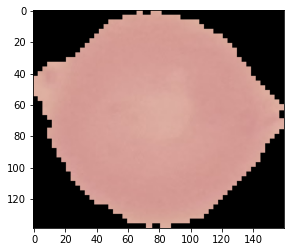

In [45]:
plt.imshow(unifected_cell)

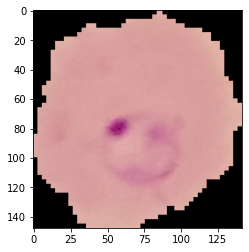

In [46]:
plt.imshow(para_img)